<a href="https://colab.research.google.com/github/olive-angelina/Food-Recognition-System/blob/main/ML_project(Food_Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UNZIPPING FOLDER

In [ ]:
# Unzip the uploaded file and extract all contents
!unzip -q /content/food101tiny.zip -d /content/extracted_folder/

# Display the list of files in the extracted folder
import os

# Walk through the extracted directory and print all files
for root, dirs, files in os.walk("/content/extracted_folder/"):
    for file in files:
        print(os.path.join(root, file))


/content/extracted_folder/data/food-101-tiny/train/tiramisu/1375000.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1705402.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1615311.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1138291.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1062773.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1257409.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1091265.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1280513.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1157925.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1288101.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1577639.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1486144.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1735605.jpg
/content/extracted_folder/data/food-101-tiny/train/tiramisu/1416

#PRE-PROCESSING


Enter the full path to your image file: /content/extracted_folder/data/food-101-tiny/train/ramen/1004562.jpg


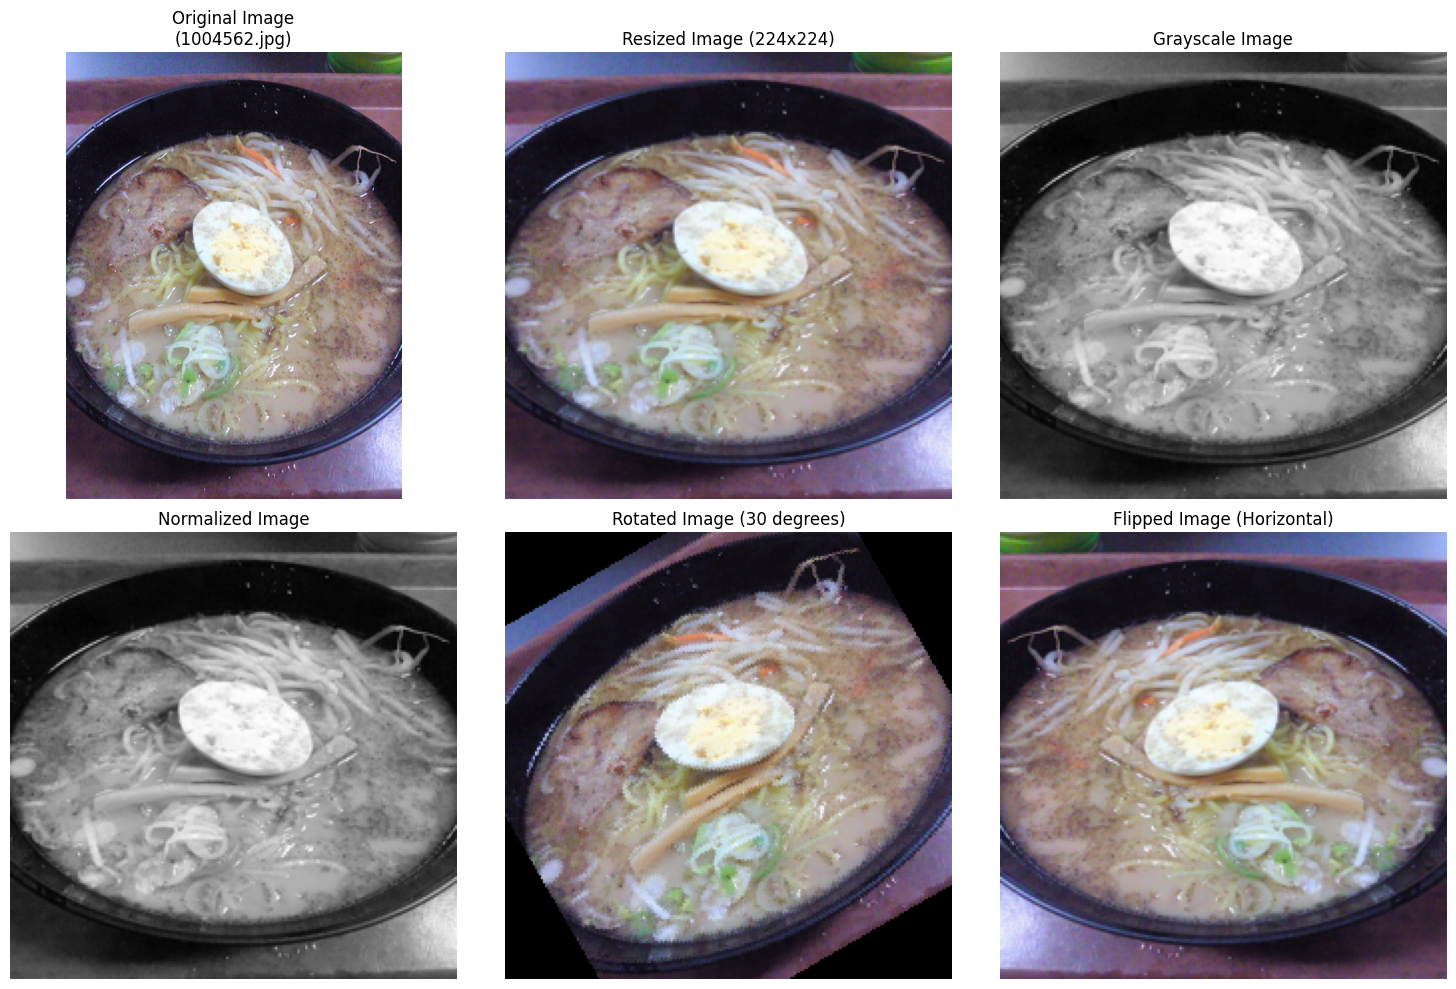

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to preprocess the image
def preprocess_image(image_path):
    # Open the image
    img = Image.open(image_path)

    # Step 1: Resize the image to a standard size (e.g., 224x224 for CNN models)
    resized_img = img.resize((224, 224))

    # Step 2: Convert image to grayscale (optional, depending on your model)
    grayscale_img = resized_img.convert('L')

    # Step 3: Normalize pixel values to [0, 1]
    normalized_img = np.array(grayscale_img) / 255.0

    # Step 4: Data augmentation - Rotate the image by 30 degrees
    rotated_img = resized_img.rotate(30)

    # Step 5: Data augmentation - Flip the image horizontally
    flipped_img = resized_img.transpose(Image.FLIP_LEFT_RIGHT)

    return img, resized_img, grayscale_img, normalized_img, rotated_img, flipped_img

# Function to display images side by side
def display_images(original, resized, grayscale, normalized, rotated, flipped, image_name):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Original Image
    axes[0, 0].imshow(original)
    axes[0, 0].set_title(f"Original Image\n({image_name})")
    axes[0, 0].axis('off')

    # Resized Image
    axes[0, 1].imshow(resized)
    axes[0, 1].set_title("Resized Image (224x224)")
    axes[0, 1].axis('off')

    # Grayscale Image
    axes[0, 2].imshow(grayscale, cmap='gray')
    axes[0, 2].set_title("Grayscale Image")
    axes[0, 2].axis('off')

    # Normalized Image
    axes[1, 0].imshow(normalized, cmap='gray')
    axes[1, 0].set_title("Normalized Image")
    axes[1, 0].axis('off')

    # Rotated Image
    axes[1, 1].imshow(rotated)
    axes[1, 1].set_title("Rotated Image (30 degrees)")
    axes[1, 1].axis('off')

    # Flipped Image
    axes[1, 2].imshow(flipped)
    axes[1, 2].set_title("Flipped Image (Horizontal)")
    axes[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

# Main function to process a user-specified image
if __name__ == "__main__":
    # Prompt the user to input the image file path
    image_path = input("Enter the full path to your image file: ").strip()

    # Check if the file exists and is an image
    if not os.path.isfile(image_path):
        print(f"The file '{image_path}' does not exist.")
    elif not image_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        print(f"The file '{image_path}' is not a valid image file.")
    else:
        # Extract the image name for display purposes
        image_name = os.path.basename(image_path)

        # Preprocess the image
        original, resized, grayscale, normalized, rotated, flipped = preprocess_image(image_path)

        # Display the images before and after preprocessing
        display_images(original, resized, grayscale, normalized, rotated, flipped, image_name)

#FEATURE EXTRACTION : EDGE DETECTION : CANNY EDGE DETECTION

<Figure size 640x480 with 0 Axes>

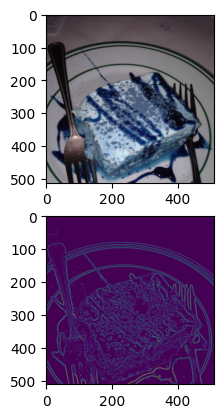

In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


# defining the canny detector function

# here weak_th and strong_th are thresholds for
# double thresholding step
def Canny_detector(img, weak_th = None, strong_th = None):

	# conversion of image to grayscale
	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	# Noise reduction step
	img = cv2.GaussianBlur(img, (5, 5), 1.4)

	# Calculating the gradients
	gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
	gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

	# Conversion of Cartesian coordinates to polar
	mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)

	# setting the minimum and maximum thresholds
	# for double thresholding
	mag_max = np.max(mag)
	if not weak_th:weak_th = mag_max * 0.1
	if not strong_th:strong_th = mag_max * 0.5

	# getting the dimensions of the input image
	height, width = img.shape

	# Looping through every pixel of the grayscale
	# image
	for i_x in range(width):
		for i_y in range(height):

			grad_ang = ang[i_y, i_x]
			grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)

			# selecting the neighbours of the target pixel
			# according to the gradient direction
			# In the x axis direction
			if grad_ang<= 22.5:
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y

			# top right (diagonal-1) direction
			elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
				neighb_1_x, neighb_1_y = i_x-1, i_y-1
				neighb_2_x, neighb_2_y = i_x + 1, i_y + 1

			# In y-axis direction
			elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
				neighb_1_x, neighb_1_y = i_x, i_y-1
				neighb_2_x, neighb_2_y = i_x, i_y + 1

			# top left (diagonal-2) direction
			elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
				neighb_1_x, neighb_1_y = i_x-1, i_y + 1
				neighb_2_x, neighb_2_y = i_x + 1, i_y-1

			# Now it restarts the cycle
			elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
				neighb_1_x, neighb_1_y = i_x-1, i_y
				neighb_2_x, neighb_2_y = i_x + 1, i_y

			# Non-maximum suppression step
			if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
				if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
					mag[i_y, i_x]= 0
					continue

			if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
				if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
					mag[i_y, i_x]= 0

	weak_ids = np.zeros_like(img)
	strong_ids = np.zeros_like(img)
	ids = np.zeros_like(img)

	# double thresholding step
	for i_x in range(width):
		for i_y in range(height):

			grad_mag = mag[i_y, i_x]

			if grad_mag<weak_th:
				mag[i_y, i_x]= 0
			elif strong_th>grad_mag>= weak_th:
				ids[i_y, i_x]= 1
			else:
				ids[i_y, i_x]= 2


	# finally returning the magnitude of
	# gradients of edges
	return mag

frame = cv2.imread('/content/extracted_folder/data/food-101-tiny/train/tiramisu/1034333.jpg')

# calling the designed function for
# finding edges
canny_img = Canny_detector(frame)

# Displaying the input and output image
plt.figure()
f, plots = plt.subplots(2, 1)
plots[0].imshow(frame)
plots[1].imshow(canny_img)


#CANNY EDGE DETECTION

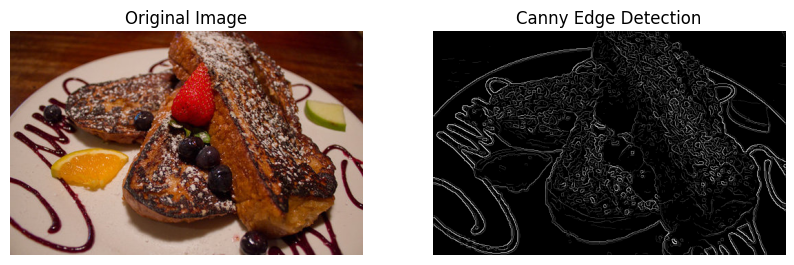

Feature extraction completed for all images.


In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

# Define the Canny detector function
def Canny_detector(img, weak_th=None, strong_th=None):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(img, (5, 5), 1.4)
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    mag_max = np.max(mag)
    if not weak_th: weak_th = mag_max * 0.1
    if not strong_th: strong_th = mag_max * 0.5
    height, width = img.shape

    for i_x in range(width):
        for i_y in range(height):
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang - 180) if abs(grad_ang) > 180 else abs(grad_ang)

            if grad_ang <= 22.5:
                neighb_1_x, neighb_1_y = i_x - 1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
            elif grad_ang > 22.5 and grad_ang <= (22.5 + 45):
                neighb_1_x, neighb_1_y = i_x - 1, i_y - 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
            elif grad_ang > (22.5 + 45) and grad_ang <= (22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y - 1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
            elif grad_ang > (22.5 + 90) and grad_ang <= (22.5 + 135):
                neighb_1_x, neighb_1_y = i_x - 1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y - 1
            elif grad_ang > (22.5 + 135) and grad_ang <= (22.5 + 180):
                neighb_1_x, neighb_1_y = i_x - 1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y

            if width > neighb_1_x >= 0 and height > neighb_1_y >= 0:
                if mag[i_y, i_x] < mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x] = 0
                    continue

            if width > neighb_2_x >= 0 and height > neighb_2_y >= 0:
                if mag[i_y, i_x] < mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x] = 0

    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)
    ids = np.zeros_like(img)

    for i_x in range(width):
        for i_y in range(height):
            grad_mag = mag[i_y, i_x]
            if grad_mag < weak_th:
                mag[i_y, i_x] = 0
            elif strong_th > grad_mag >= weak_th:
                ids[i_y, i_x] = 1
            else:
                ids[i_y, i_x] = 2

    return mag

# Function to process all images in a directory
def process_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, input_dir)
                output_subdir = os.path.join(output_dir, relative_path)

                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)

                img = cv2.imread(image_path)
                if img is not None:
                    canny_img = Canny_detector(img)
                    output_path = os.path.join(output_subdir, file)
                    cv2.imwrite(output_path, canny_img)
                    print(f"Processed and saved: {output_path}")
                else:
                    print(f"Failed to load image: {image_path}")

# Define input and output directories
input_dataset_dir = '/content/extracted_folder'
output_dataset_dir = '/content/canny_features_extraction_folder'

# Process a sample image to check feature extraction
sample_image_path = '/content/extracted_folder/data/food-101-tiny/train/french_toast/1042091.jpg'  # Replace with a valid path
if os.path.exists(sample_image_path):
    sample_img = cv2.imread(sample_image_path)
    if sample_img is not None:
        canny_sample_img = Canny_detector(sample_img)

        # Display the original and edge-detected images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(canny_sample_img, cmap='gray')
        plt.title('Canny Edge Detection')
        plt.axis('off')

        plt.show()
    else:
        print(f"Failed to load sample image: {sample_image_path}")
else:
    print(f"Sample image path does not exist: {sample_image_path}")

# Process train and valid folders
process_images(os.path.join(input_dataset_dir, 'train'), os.path.join(output_dataset_dir, 'train'))
process_images(os.path.join(input_dataset_dir, 'valid'), os.path.join(output_dataset_dir, 'valid'))

print("Feature extraction completed for all images.")

#CONTOUR ANALYSIS : SHAPE BASED DETECTION

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import zipfile



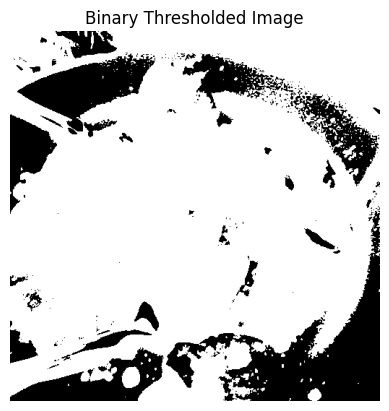

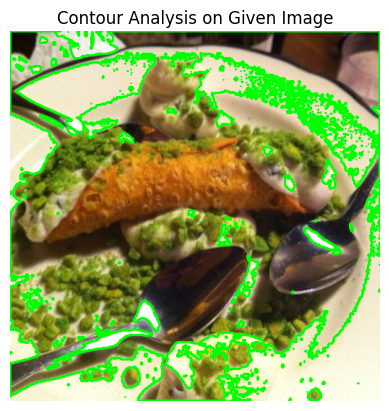

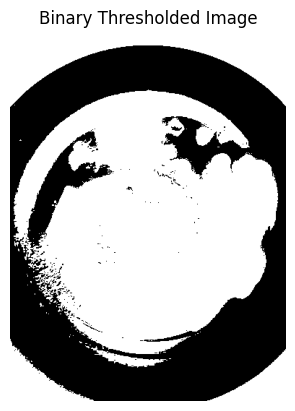

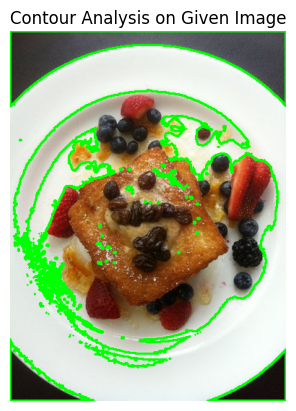

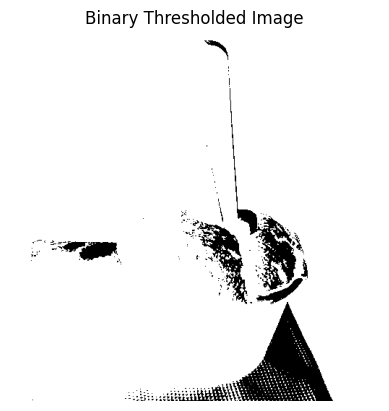

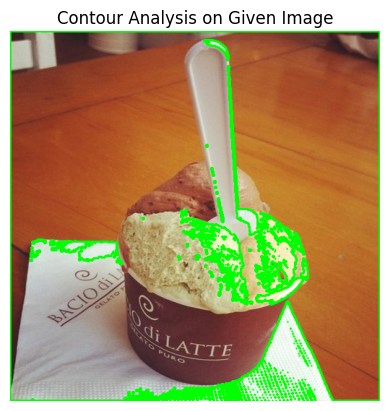

CONTOUR ANALYSIS APPLIED ON all IMAGES


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Function to apply contour analysis
def apply_contour_analysis(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return None  # Skip if the image cannot be read

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Create and display the binary thresholded image
    _, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(binary, cmap="gray")
    plt.axis("off")
    plt.title("Binary Thresholded Image")
    plt.show()

    # Apply contour detection
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    return image

# Function to analyze a single image by providing its path
def analyze_single_image(image_path):
    processed_image = apply_contour_analysis(image_path)
    if processed_image is not None:
        plt.imshow(processed_image)
        plt.axis("off")
        plt.title("Contour Analysis on Given Image")
        plt.show()

# Example usage: Provide paths to specific images
image_path1 = "/content/extracted_folder/data/food-101-tiny/train/cannoli/1185937.jpg"
image_path2 = "/content/extracted_folder/data/food-101-tiny/train/french_toast/1057911.jpg"
image_path3 = "/content/extracted_folder/data/food-101-tiny/train/ice_cream/1816086.jpg"

analyze_single_image(image_path1)
analyze_single_image(image_path2)
analyze_single_image(image_path3)

# Print completion message
print("CONTOUR ANALYSIS APPLIED ON all IMAGES")


#HU MOMENTS

In [ ]:
# Read image as grayscale image
filename = '/content/extracted_folder/data/food-101-tiny/train/apple_pie/1166210.jpg'
im = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
print(im)
im = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
print(im)
# Calculate Moments
moments = cv2.moments(im)
# Calculate Hu Moments
huMoments = cv2.HuMoments(moments)
print(huMoments)


[[255 252 249 ...  25  25  24]
 [246 249 253 ...  23  23  23]
 [202 212 223 ...  20  21  22]
 ...
 [  4   4   4 ...  10   8   5]
 [  4   4   4 ...  10  10   8]
 [  5   5   5 ...   9  11  10]]
[[255 252 249 ...  25  25  24]
 [246 249 253 ...  23  23  23]
 [202 212 223 ...  20  21  22]
 ...
 [  4   4   4 ...  10   8   5]
 [  4   4   4 ...  10  10   8]
 [  5   5   5 ...   9  11  10]]
[[ 1.31691446e-03]
 [ 1.13124198e-08]
 [ 4.70821826e-11]
 [ 2.90828094e-11]
 [ 8.33302203e-22]
 [-2.61324828e-15]
 [-6.80999040e-22]]


In [ ]:
import numpy as np

# Assuming huMoments is already computed as a NumPy array
for i in range(7):
    if huMoments[i] != 0:  # Avoid log(0) errors
        huMoments[i] = -np.sign(huMoments[i]) * np.log10(abs(huMoments[i]))

# Print the modified Hu Moments
print("Log-Scaled Hu Moments:", huMoments)


Log-Scaled Hu Moments: [[  2.88044243]
 [  7.94644449]
 [ 10.32714341]
 [ 10.53636364]
 [ 21.07919747]
 [-14.58281933]
 [-21.1668535 ]]


#LBP

LBP image saved to /content/extracted_folder_1/lbp_1166210.jpg


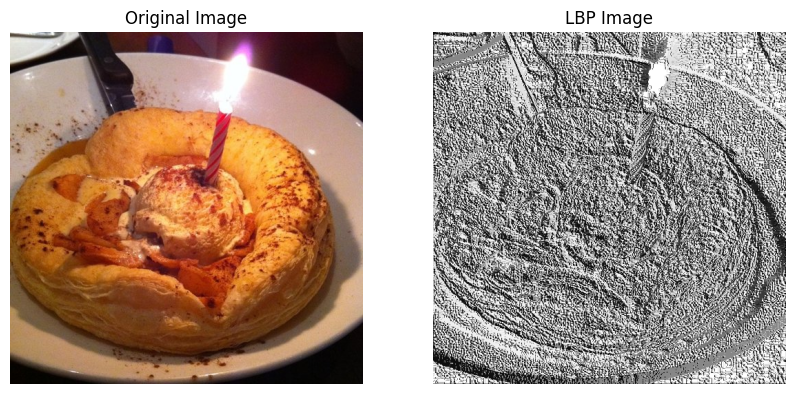

LBP Program is finished


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y-1))  # top_left
    val_ar.append(get_pixel(img, center, x-1, y))   # top
    val_ar.append(get_pixel(img, center, x-1, y + 1))  # top_right
    val_ar.append(get_pixel(img, center, x, y + 1))  # right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))  # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y))  # bottom
    val_ar.append(get_pixel(img, center, x + 1, y-1))  # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))  # left

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val

def process_single_image(img_path, output_dir):
    # Read the image
    img_bgr = cv2.imread(img_path, 1)
    if img_bgr is None:
        print(f"Error: Unable to read image at {img_path}")
        return

    height, width, _ = img_bgr.shape

    # Convert to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Create an empty array for LBP image
    img_lbp = np.zeros((height, width), np.uint8)

    # Compute LBP for each pixel
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

    # Save the LBP image
    img_name = os.path.basename(img_path)
    output_path = os.path.join(output_dir, f"lbp_{img_name}")
    cv2.imwrite(output_path, img_lbp)
    print(f"LBP image saved to {output_path}")

    # Display the original and LBP images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_lbp, cmap="gray")
    plt.title("LBP Image")
    plt.axis('off')

    plt.show()

# Example usage
image_path = "/content/extracted_folder/data/food-101-tiny/train/apple_pie/1166210.jpg"  # Replace with the path to your image
output_directory = "/content/extracted_folder_1"  # Replace with your desired output directory

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Process the single image
process_single_image(image_path, output_directory)
print("LBP Program is finished")

#color histogram

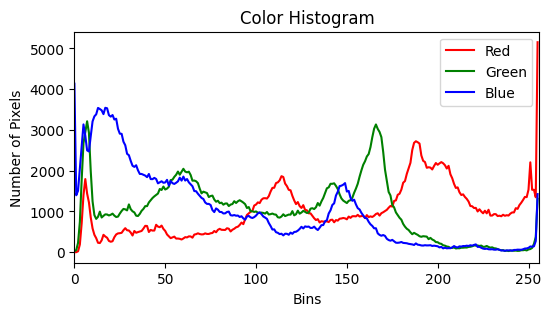

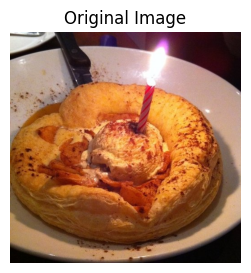

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def compute_color_histogram(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return

    # Convert the image from BGR to RGB (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split the image into its respective channels (R, G, B)
    channels = cv2.split(image_rgb)
    colors = ('r', 'g', 'b')  # Colors for plotting
    channel_names = ('Red', 'Green', 'Blue')

    # Plot the histograms
    plt.figure(figsize=(6, 3))
    plt.title("Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("Number of Pixels")

    for channel, color, name in zip(channels, colors, channel_names):
        # Compute the histogram for the current channel
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        # Plot the histogram
        plt.plot(hist, color=color, label=name)
        plt.xlim([0, 256])

    # Add a legend
    plt.legend()

    # Show the original image
    plt.figure(figsize=(4, 3))
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    # Show the plots
    plt.show()

# Example usage
image_path = "/content/extracted_folder/data/food-101-tiny/train/apple_pie/1166210.jpg"  # Replace with the path to your image
compute_color_histogram(image_path)

#CODE - HYBRID MODEL DESIGN


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
import os

# Define dataset paths
train_dir = "/content/extracted_folder/data/food-101-tiny/train"
valid_dir = "/content/extracted_folder/data/food-101-tiny/valid"

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 10  # Number of classes in dataset
CLASS_NAMES = ['apple_pie', 'bibimbap', 'cannoli', 'edamame', 'falafel', 'french_toast', 'ice_cream', 'ramen', 'sushi', 'tiramisu']

# Data Augmentation and Loading
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, horizontal_flip=True)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical')

# Load pre-trained EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Define custom CNN classifier
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

# Compile model
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
EPOCHS = 10  # Change based on performance
history = model.fit(train_generator, validation_data=valid_generator, epochs=EPOCHS)

# Save trained model
model.save("food_classifier.h5")
print("Model saved as food_classifier.h5")


Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.4080 - loss: 1.7135 - val_accuracy: 0.8520 - val_loss: 0.5464
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.7853 - loss: 0.6692 - val_accuracy: 0.8600 - val_loss: 0.4114
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.8349 - loss: 0.5202 - val_accuracy: 0.8580 - val_loss: 0.4094
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.8675 - loss: 0.4089 - val_accuracy: 0.8580 - val_loss: 0.3955
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 171s 4s/step - accuracy: 0.8622 - loss: 0.3887 - val_accuracy: 0.8620 - val_loss: 0.3718
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.9056 - loss: 0.3138 - val_accuracy: 0.8700 - val_loss: 0.3524
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.9020 - loss: 0.3109 - val_accuracy: 0.8680 - val_loss: 0.3659
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.9248 - loss: 0.2467 - val_accuracy: 0.8680 - v

Model saved as food_classifier.h5


In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Input
from sklearn.svm import SVC
import numpy as np
import joblib  # For saving the trained SVM model
import os

# Define dataset paths
train_dir = "/content/extracted_folder/data/food-101-tiny/train"
valid_dir = "/content/extracted_folder/data/food-101-tiny/valid"

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 10  # Number of classes in dataset
CLASS_NAMES = ['apple_pie', 'bibimbap', 'cannoli', 'edamame', 'falafel', 'french_toast', 'ice_cream', 'ramen', 'sushi', 'tiramisu']

# Data Augmentation and Loading
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)

# Load pre-trained EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model

# Define feature extractor model
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)  # Extract global features
feature_extractor = Model(inputs, x)

# Extract features for training
train_features = feature_extractor.predict(train_generator)
valid_features = feature_extractor.predict(valid_generator)

# Get corresponding labels (corrected)
train_labels = train_generator.classes  # Already a 1D array
valid_labels = valid_generator.classes  # Already a 1D array

# Train an SVM on extracted CNN features
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(train_features, train_labels)

# Evaluate on validation set
svm_accuracy = svm_model.score(valid_features, valid_labels)
print(f"SVM Validation Accuracy: {svm_accuracy * 100:.2f}%")

# Save the SVM model
joblib.dump(svm_model, "food_classifier_svm.pkl")
print("SVM model saved as food_classifier_svm.pkl")

Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 257ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step
SVM Validation Accuracy: 86.00%
SVM model saved as food_classifier_svm.pkl


#CODE HYBRID MODEL IMPLEMENTATION

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}


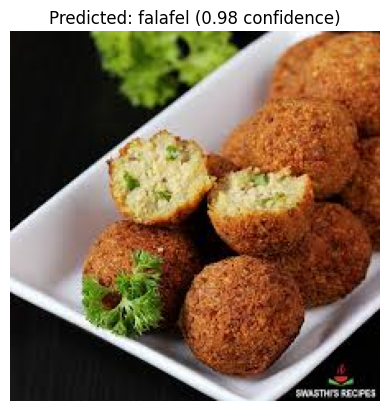

Classification Report:
              precision    recall  f1-score   support

   apple_pie       0.73      0.90      0.81        30
    bibimbap       0.84      0.90      0.87        30
     cannoli       0.96      0.77      0.85        30
     edamame       0.97      1.00      0.98        30
     falafel       0.77      0.80      0.79        30
french_toast       0.88      0.97      0.92        30
   ice_cream       0.83      0.80      0.81        30
       ramen       1.00      0.93      0.97        30
       sushi       0.86      0.80      0.83        30
    tiramisu       0.93      0.83      0.88        30

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300

Accuracy: 87.00%


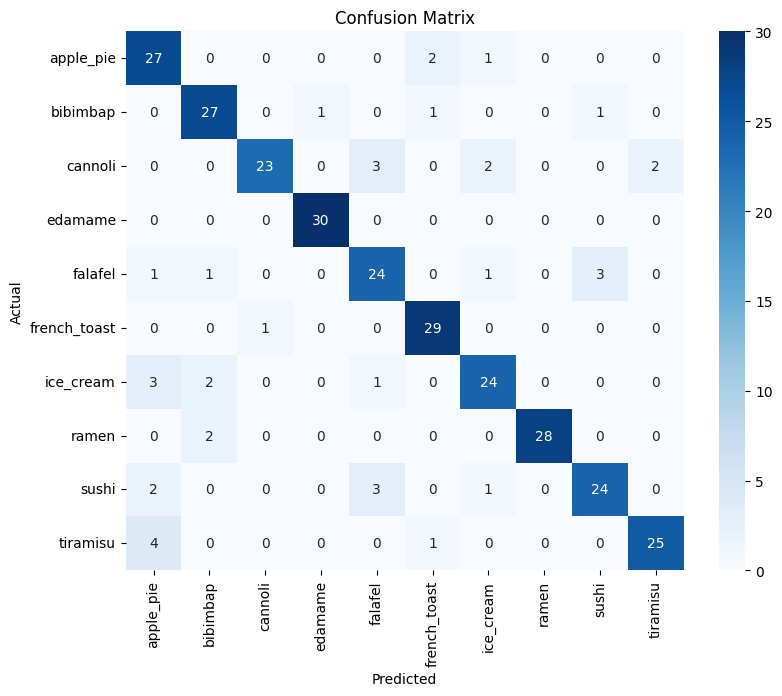

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define constants
IMG_SIZE = (224, 224)
CLASS_NAMES = ['apple_pie', 'bibimbap', 'cannoli', 'edamame', 'falafel', 'french_toast', 'ice_cream', 'ramen', 'sushi', 'tiramisu']
SVM_MODEL_PATH = "high_accuracy_food_classifier_svm.pkl"

# Load EfficientNetB0 feature extractor with fine-tuning
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[-50:]:  # Unfreeze last 50 layers
    layer.trainable = True

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=True)
x = GlobalAveragePooling2D()(x)
feature_extractor = Model(inputs, x)

# Feature extraction function
def extract_features(image_path):
    img = image.load_img(image_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = feature_extractor.predict(img_array, verbose=0)
    return features

# Train SVM with hyperparameter tuning
def train_svm(train_dir):
    X_train, y_train = [], []

    for i, class_name in enumerate(CLASS_NAMES):
        class_path = os.path.join(train_dir, class_name)
        if os.path.exists(class_path):
            for img_name in os.listdir(class_path)[:100]:  # Increase images per class
                img_path = os.path.join(class_path, img_name)
                features = extract_features(img_path)
                X_train.append(features[0])
                y_train.append(i)

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Apply PCA for feature reduction
    pca = PCA(n_components=0.98)  # Keep 98% variance for better accuracy
    X_train = pca.fit_transform(X_train)

    # Hyperparameter tuning
    param_grid = {
        'C': [0.1, 1, 10, 100, 1000],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.001, 0.0001]
    }

    svm = SVC(probability=True)
    svm_tuned = RandomizedSearchCV(svm, param_distributions=param_grid, cv=3, n_iter=10, verbose=2, n_jobs=-1)
    svm_tuned.fit(X_train, y_train)

    print("Best Parameters:", svm_tuned.best_params_)
    joblib.dump((svm_tuned.best_estimator_, pca), SVM_MODEL_PATH)

# Predict function
def predict_food(image_path):
    if not os.path.exists(SVM_MODEL_PATH):
        raise FileNotFoundError("SVM model not trained! Train it first.")

    svm_model, pca = joblib.load(SVM_MODEL_PATH)
    features = extract_features(image_path)
    features_pca = pca.transform(features)

    predicted_class_index = svm_model.predict(features_pca)[0]
    predicted_class = CLASS_NAMES[predicted_class_index]
    confidence = np.max(svm_model.predict_proba(features_pca))

    plt.imshow(image.load_img(image_path))
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f} confidence)")
    plt.show()

    return predicted_class

# Evaluate the model
def evaluate_model(validation_dir):
    if not os.path.exists(SVM_MODEL_PATH):
        raise FileNotFoundError("SVM model not trained! Train it first.")

    svm_model, pca = joblib.load(SVM_MODEL_PATH)
    y_true, y_pred = [], []

    for i, class_name in enumerate(CLASS_NAMES):
        class_path = os.path.join(validation_dir, class_name)
        if os.path.exists(class_path):
            for img_name in os.listdir(class_path)[:30]:  # Increase validation set
                img_path = os.path.join(class_path, img_name)
                features = extract_features(img_path)
                features_pca = pca.transform(features)
                prediction = svm_model.predict(features_pca)[0]

                y_true.append(i)
                y_pred.append(prediction)

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))
    print(f"Accuracy: {accuracy_score(y_true, y_pred) * 100:.2f}%")

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(9, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Model Definitions:
# 1. EfficientNetB0: CNN used as a feature extractor
# 2. PCA: Used for dimensionality reduction
# 3. SVM: Trained with RandomizedSearchCV for classification

# Example Usage
train_svm("/content/extracted_folder/data/food-101-tiny/train")  # Train model
predict_food("/content/flf.jpeg")  # Predict on an image
evaluate_model("/content/extracted_folder/data/food-101-tiny/valid")  # Evaluate model